**Gráfica de KL-Bernoulli**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

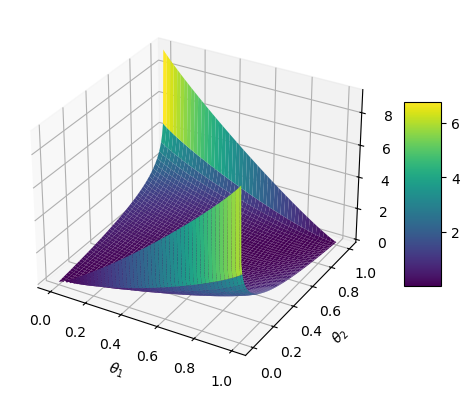

In [31]:
def kl_bern(theta):
  a = (1 - theta[0]) / (1 - theta[1])
  b = theta[0] / theta[1]
  return np.log(a) + theta[0] * np.log(b / a)

# Graficamos KL
from mpl_toolkits.mplot3d import Axes3D

epsilon = 1e-4
theta_1 = np.linspace(epsilon, 1 - epsilon, 100)
theta_2 = np.linspace(epsilon, 1 - epsilon, 100)
X, Y = np.meshgrid(theta_1, theta_2)
Z = kl_bern(np.array([X, Y]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$f(x, y)$')
plt.savefig('KL_Bernoulli.png',  bbox_inches='tight')
plt.show()

---

La base de datos Animales con Atributos (Animals with Attributes) contiene información sobre 50 animales. Para cada uno, se tienen 85 características de valor real que capturan varias propiedades del animal: dónde vive, qué come, etc.

Usa ISOMAP, LLE, T-SNE y SOM’s para encontrar visualizaciones informativas de los datos y encontrar grupos.

Se usan 3 archivos: 
- `classes.txt`: los nombres de cada animal
- `predicates.txt`: los nombres de las características (columnas)
- `predicate-matrix-continuous.txt`: la matriz de datos

---

In [3]:
# Primero importamos y leemos los datos
import pandas as pd

df = pd.read_csv('predicate-matrix-continuous.txt', sep='\s+', header=None)
df = pd.DataFrame(df)

predicates = []
with open('predicates.txt', 'r', encoding='utf-8') as file:
    for linea in file:
      linea_limpia = linea.strip()
      partes = linea_limpia.split('\t', 1)
      predicates.append(partes[1])
df.columns = predicates
df.head()

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,water,tree,cave,fierce,timid,smart,group,solitary,nestspot,domestic
0,-1.00,-1.00,-1.0,-1.00,12.34,0.0,0.0,0.0,16.11,9.19,...,0.00,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38
1,39.25,1.39,0.0,74.14,3.75,0.0,0.0,0.0,1.25,0.00,...,7.64,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39
2,83.40,64.79,0.0,0.00,1.25,0.0,0.0,0.0,68.49,32.69,...,79.49,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42
3,19.38,0.00,0.0,87.81,7.50,0.0,0.0,0.0,0.00,7.50,...,65.62,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12
4,69.58,73.33,0.0,6.39,0.00,0.0,0.0,0.0,37.08,100.00,...,1.25,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71


In [4]:
# Leemos los nombres de los animales
classes = []
with open('classes.txt', 'r', encoding='utf-8') as file:
  for linea in file:
    linea_limpia = linea.strip()
    partes = linea_limpia.split('\t', 1)
    classes.append(partes[1])
print(classes)

['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'persian+cat', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard', 'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer', 'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'raccoon', 'cow', 'dolphin']


In [5]:
# Vistazo a los datos
desc_stats = df.describe()
print('Descriptive statistics:\n', desc_stats)

Descriptive statistics:
            black      white       blue      brown       gray     orange  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean   35.353000  26.855200   4.213400  38.708800  26.747200   5.425800   
std    26.045034  27.883534  11.683817  25.864638  22.947985  13.819145   
min    -1.000000  -1.000000  -1.000000  -1.000000   0.000000   0.000000   
25%    11.150000   4.490000   0.000000  15.745000   6.315000   0.000000   
50%    34.335000  17.660000   0.000000  44.385000  24.115000   0.000000   
75%    47.335000  42.525000   1.170000  58.377500  39.330000   2.247500   
max    91.550000  95.620000  67.080000  91.200000  83.970000  72.910000   

             red     yellow    patches      spots  ...      water      tree  \
count  50.000000  50.000000  50.000000   50.00000  ...  50.000000  50.00000   
mean    1.616200   3.463800  17.408000   13.75320  ...  15.442400  11.17700   
std     5.891372   9.578035  19.141367   21.20285  ...  28.150

In [6]:
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [7]:
# Primero aplicamos T-SNE
import seaborn as sns
from sklearn.manifold import TSNE

# Aplicamos TSNE y creamos un dataframe con los resultados
tsne = TSNE(n_components=2, random_state=42)
data_transform = tsne.fit_transform(df_scaled)

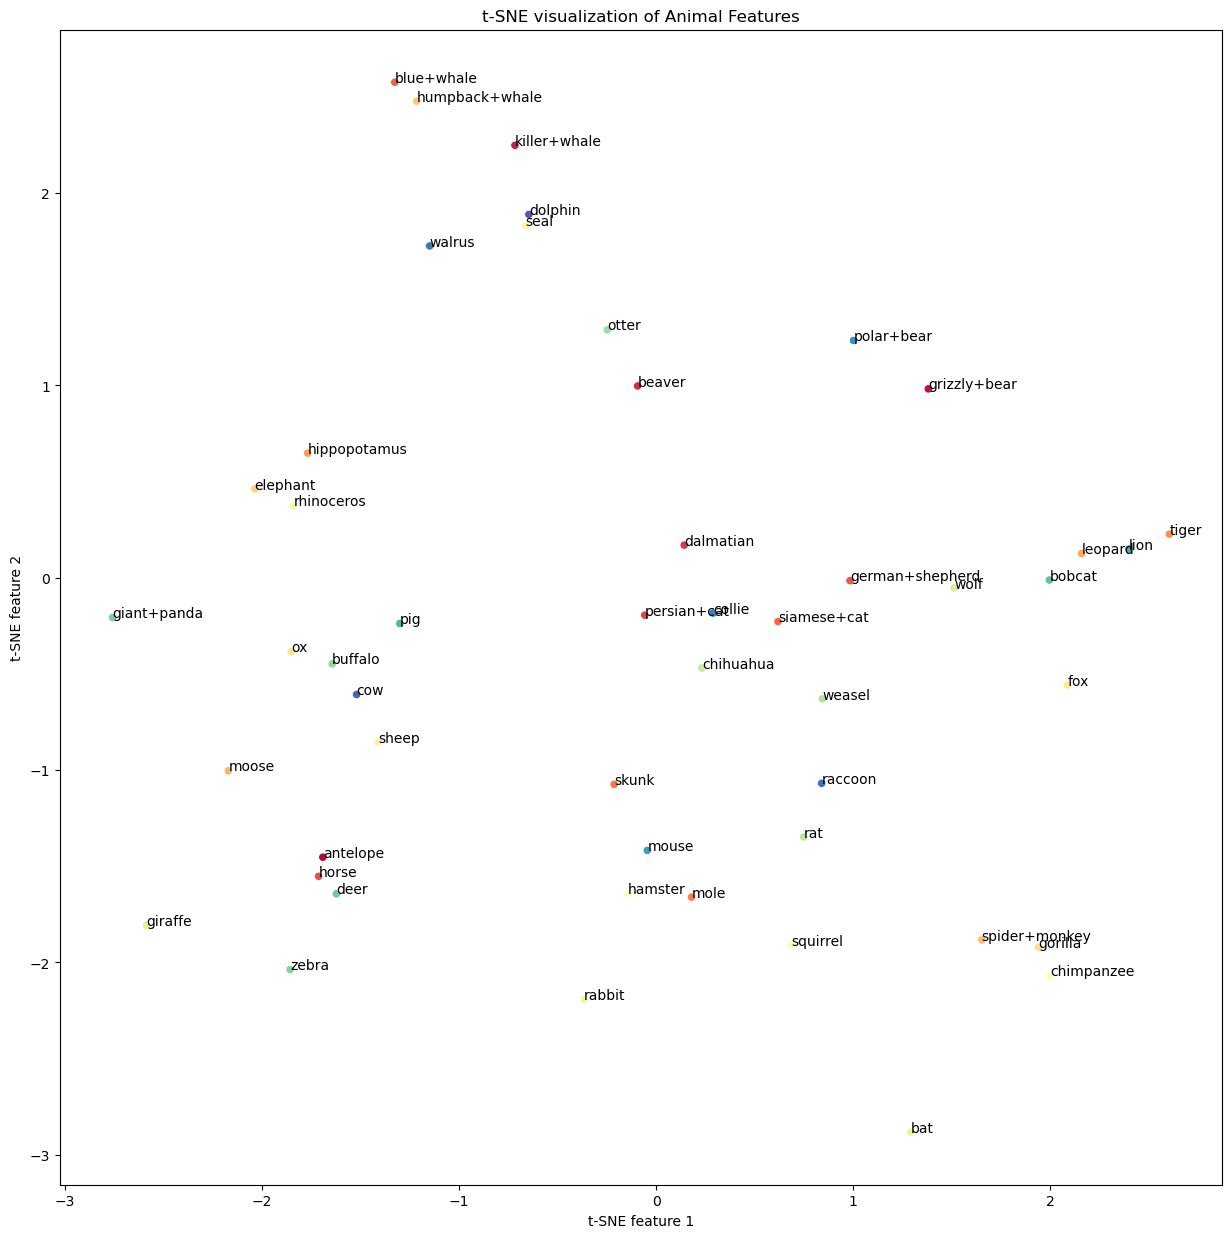

In [8]:
# Graficamos los resultados
tsne_df = pd.DataFrame({
    'TSNE-1':data_transform[:, 0], 'TSNE-2' : data_transform[:, 1], 'Animal Name' : classes
})
plt.figure(figsize=(15, 15))
sns.scatterplot(x='TSNE-1', y='TSNE-2', hue='Animal Name', palette='Spectral', data=tsne_df, legend=False)
plt.title('t-SNE visualization of Animal Features')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
# plt.legend(title='Animal Name', bbox_to_anchor=(1.05, 1), loc='upper left')

for i in range(len(classes)):
  plt.annotate(classes[i], (data_transform[i, 0], data_transform[i, 1]))

plt.show()

In [9]:
# Aplicamos ISOMAP
from sklearn.manifold import Isomap

# Aplicamos Isomap y creamos un dataframe con los resultados
isomap = Isomap(n_components=2)
data_transform = isomap.fit_transform(df_scaled)

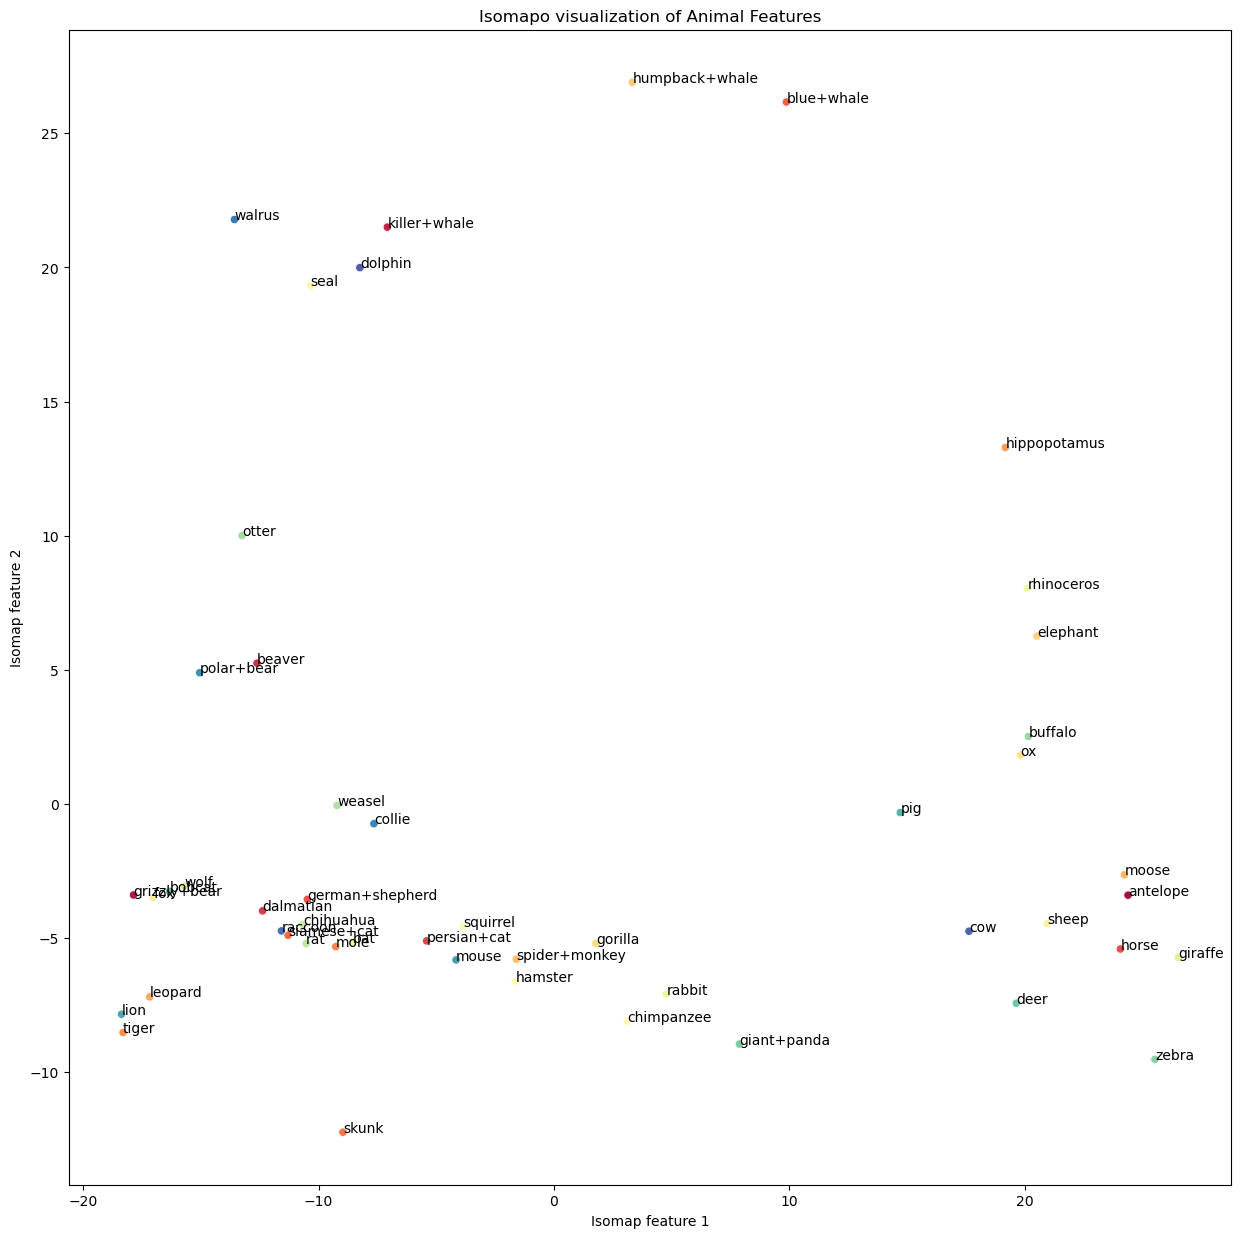

In [10]:
# Graficamos los resultados
isomap_df = pd.DataFrame({
    'Isomap-1':data_transform[:, 0], 'Isomap-2' : data_transform[:, 1], 'Animal Name' : classes
})
plt.figure(figsize=(15, 15))
sns.scatterplot(x='Isomap-1', y='Isomap-2', hue='Animal Name', palette='Spectral', data=isomap_df, legend=False)
plt.title('Isomapo visualization of Animal Features')
plt.xlabel('Isomap feature 1')
plt.ylabel('Isomap feature 2')

for i in range(len(classes)):
  plt.annotate(classes[i], (data_transform[i, 0], data_transform[i, 1]))

plt.show()

In [11]:
# Aplicamos Local Linear Embedding
from sklearn.manifold import LocallyLinearEmbedding

# Aplicamos LLE y creamos un dataframe con los resultados
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
data_transform = lle.fit_transform(df_scaled)

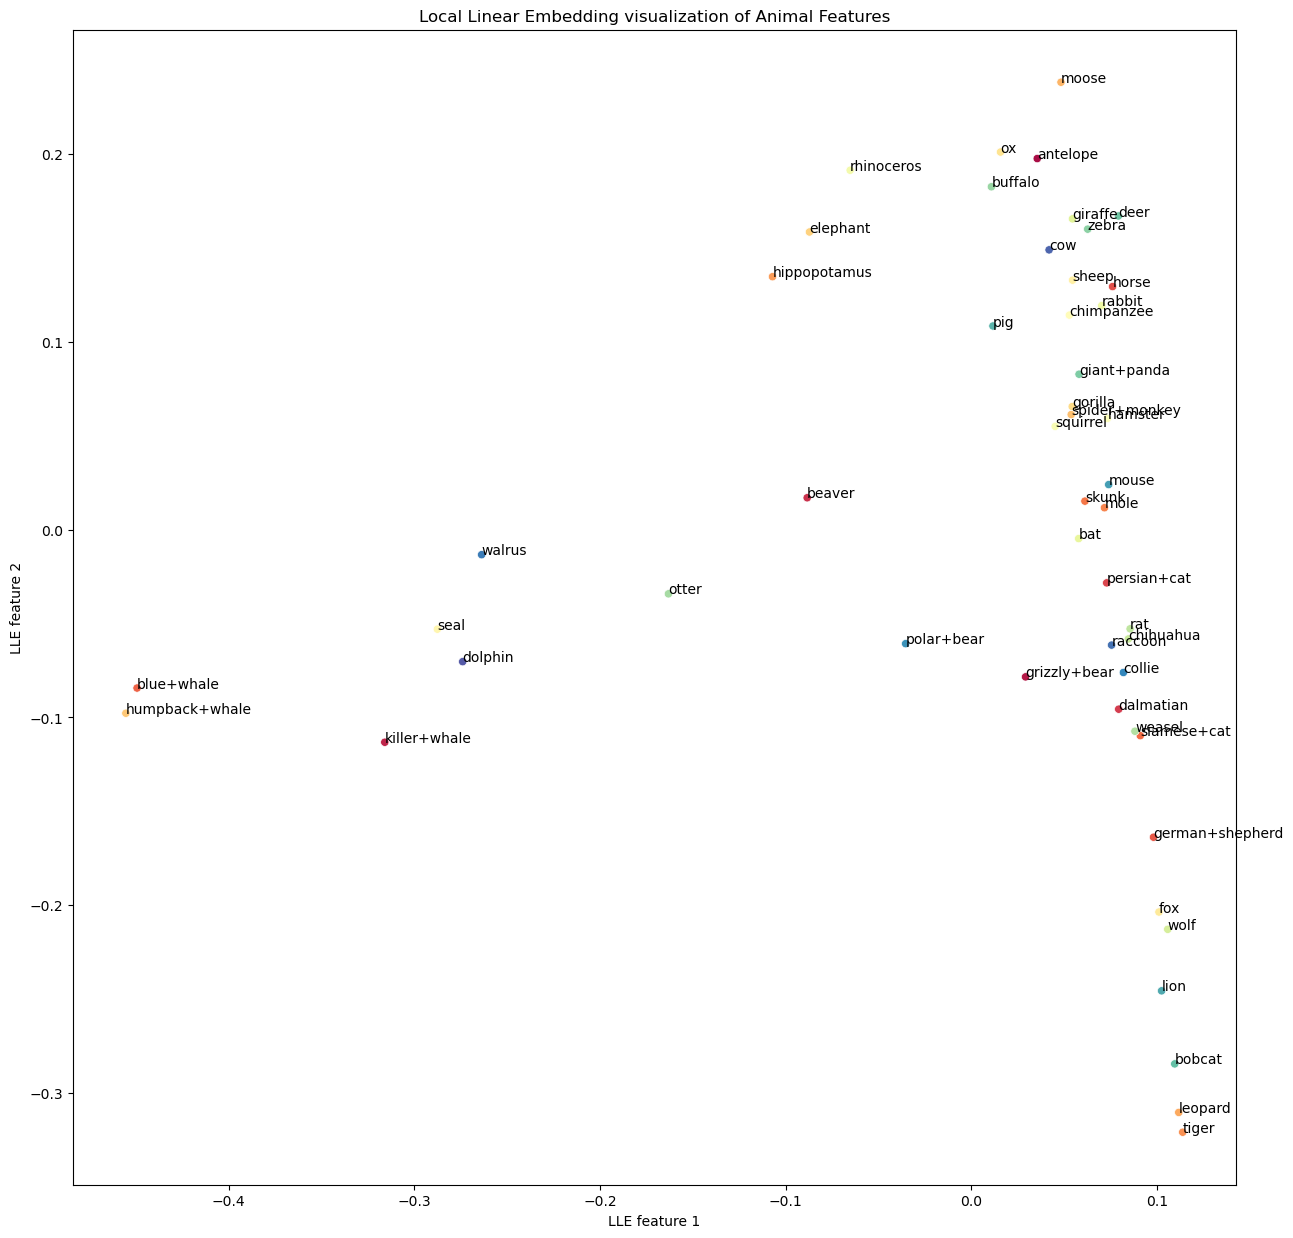

In [12]:
# Graficamos los resultados
lle_df = pd.DataFrame({
    'LLE-1':data_transform[:, 0], 'LLE-2' : data_transform[:, 1], 'Animal Name' : classes
})
plt.figure(figsize=(15, 15))
sns.scatterplot(x='LLE-1', y='LLE-2', hue='Animal Name', palette='Spectral', data=lle_df, legend=False)
plt.title('Local Linear Embedding visualization of Animal Features')
plt.xlabel('LLE feature 1')
plt.ylabel('LLE feature 2')

for i in range(len(classes)):
  plt.annotate(classes[i], (data_transform[i, 0], data_transform[i, 1]))

plt.show()

En cada una de las visualizaciones se puede apreciar que animales parecidos tienden a agruparse, recordemos que tanto Isomap como LLE tienden a preservar cierta estructura local, lo que se podría leer del contraste con la visualización para T-SNE que muestra mayor dispersión en los datos proyectados. 

---

(después de la clase de miércoles)

Toma de la base `https://faces.mpdl.mpg.de/imeji/` las caras de una misma persona. Implementa KernelPCA con kernel lineal para aproximar las caras con matrices de menor rango. Visualízalos. Solamente se puede usar una función que calcula la SVD, no las funciones de (kernel)PCA. No olvides de centrar los datos.

---

In [161]:
# Primero leemos las imágenes 
import os
from PIL import Image

directory = './faces_dataset/'

images = []
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'): 
        img_path = os.path.join(directory, filename)
        with Image.open(img_path) as img:
            # Convertimos las imágenes a escala de grises 
            img_gray = img.convert('L')
            # Convertimos la escala de grises a un arreglo de numpy 
            img_array = np.array(img_gray)
            images.append(img_array)
images = np.array(images)


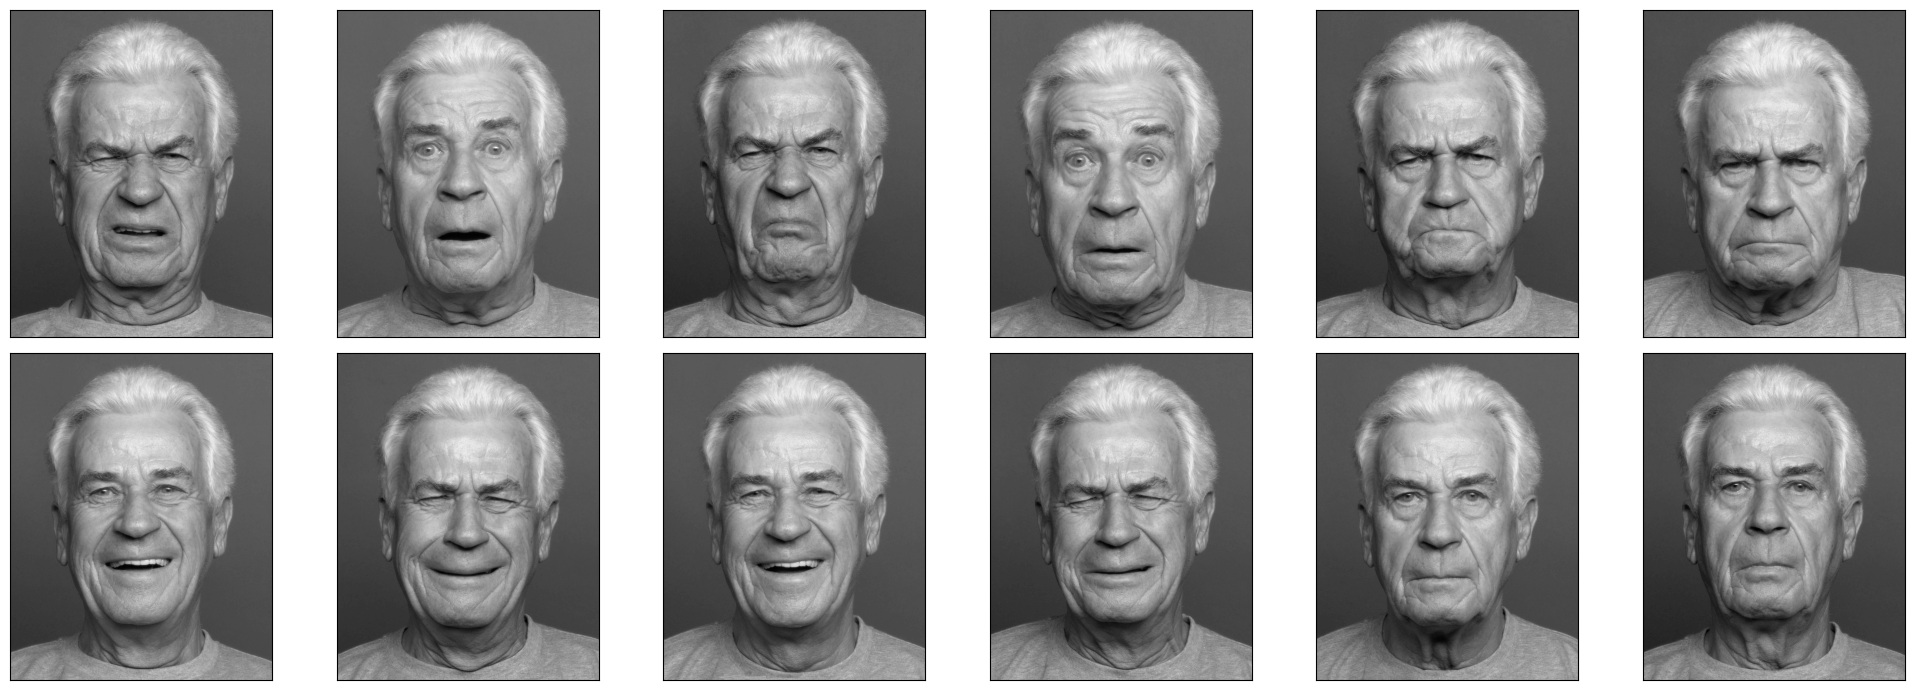

In [141]:
# Mostramos las imágenes 
# Ahora mostremos las imágenes 
n = 6
plt.figure(figsize=(20, 7))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(images[i + n])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.tight_layout()
plt.show()

In [162]:
# Calculemos la matriz de kernels
from sklearn.preprocessing import StandardScaler
num_images = 12
res = 2835 * 3543
data = images.reshape(num_images, res)
scaler = StandardScaler(with_std=False)
data_scaled = scaler.fit_transform(data)
kernel_matrix = data_scaled @ data_scaled.T

# Aplicamos SVD 
V, Sigma, VT = np.linalg.svd(kernel_matrix)

In [163]:
def image2reconstructed(image, data, n_components, VT):
    '''
    Función que dada una imagen devuelve su respectiva reconstrucción con n componentes 
    '''
    num_images = len(data)
    reconstructed_data = np.zeros(len(data[0]))
    for m in range(n_components): # Iteramos sobre los componentes 
        proyected_data = 0 # Calculamos las proyecciones 
        for i in range(num_images):
            proyected_data += ((VT[m][i] / np.sqrt(Sigma[m])) * (data[i].T @ image)) 
        direction = (data.T @ VT[m]) / np.sqrt(Sigma[m]) # Reconstruimos la imagen 
        reconstructed_data += proyected_data * direction 
    return reconstructed_data

reconstructed_data = np.zeros((num_images, res))
for k in range(num_images): # Iterate over all possible components  
    reconstructed_data[k] = image2reconstructed(data_scaled[k], data_scaled, k+1, VT)

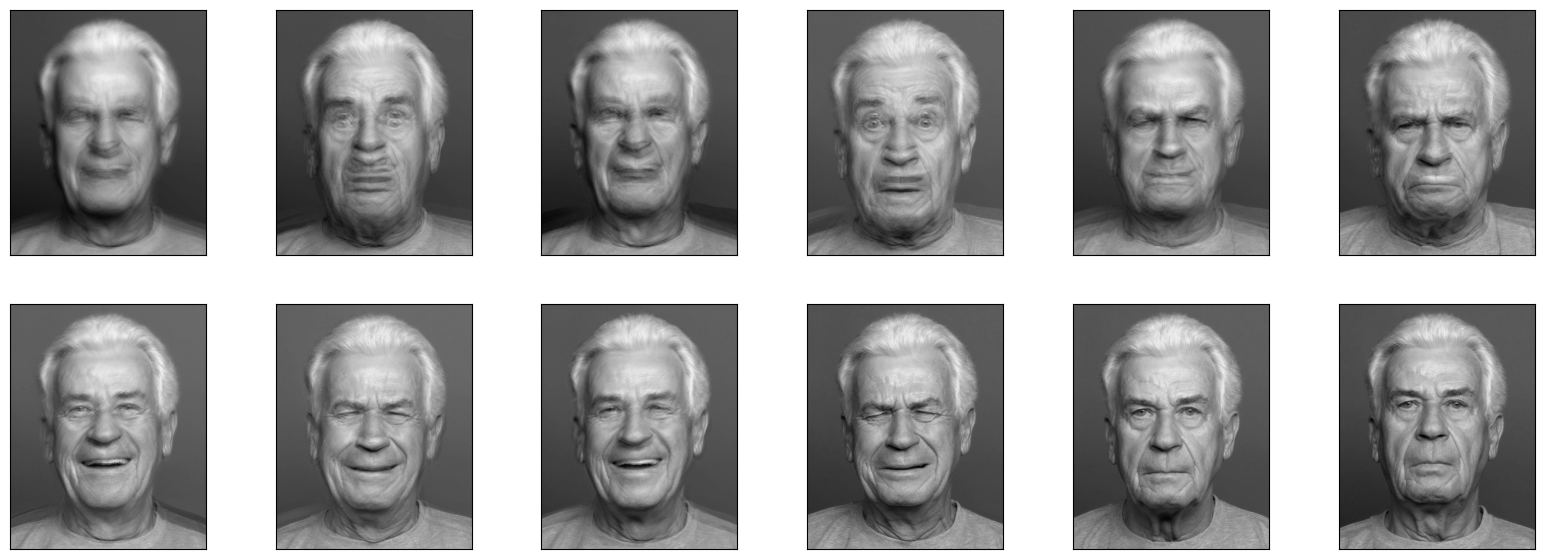

In [164]:
# Ahora mostramos las imágenes 
hight = 3543
width = 2835
original_data = scaler.inverse_transform(reconstructed_data)
reconstructed_images = original_data.reshape(num_images, hight, width)

n = 6
plt.figure(figsize=(20, 7))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(reconstructed_images[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i + n])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

Para este ejercicio, en vez de calcular las componentes sobre la estimación muestral de la matriz de covarianza lo hicimos sobre la matriz kernel, cabe resaltar la ventaja computacional, ya que la primera implicaba hacer singular value decomposition sobre una matriz cuadrada del tamaño de la resolucion (10, 044, 405), en cambio con la segunda se calcularon las componentes principales de una matriz cuadrada de 12x12. Calculamos las proyecciones dadas por PCA ajustadas a la matriz kernel y posteriormente reconstruimos en el espacio original. Las imágenes muestran la reconstrucción para 1, 2,... así hasta las 12 componentes, como se puede apreciar a medida que usamos más componentes la reconstrucción deja ver más de detalles de la expresión facial, siendo para n=12 una reconstrucción perfecta.